<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/Montecarlo_Sim_PotsdamBookShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install important packages, i.e. numpy, matplotlib and seaborn.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setting the parameters

### Simulation parameters

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
NUM_TRIALS = 10000
FIXED_COST = 450
STAFF_COST = 200
COST_PER_BOOK = 12

### Distribution Parameters

In [5]:
# Distribution parameters
CUSTOMER_MEAN = 85
CUSTOMER_STD = 15
BOOKS_PER_CUSTOMER_MEAN = 1.8
BOOKS_PER_CUSTOMER_STD = 0.5
PRICE_LOW = 15
PRICE_MODE = 22
PRICE_HIGH = 35

### Simulating one day

In [17]:
def simulate_one_day():
    """Simulate one day of operations"""
    # Generate random inputs
    # ---- The Choice of distributions is important here.
    daily_customers = np.random.normal(CUSTOMER_MEAN, CUSTOMER_STD)
    books_per_customer = np.random.normal(BOOKS_PER_CUSTOMER_MEAN, BOOKS_PER_CUSTOMER_STD)
    price_per_book = np.random.triangular(PRICE_LOW, PRICE_MODE, PRICE_HIGH)

    # Ensure no negative values
    daily_customers = max(0, daily_customers)
    books_per_customer = max(0, books_per_customer)

    # Calculate key metrics
    total_books_sold = daily_customers * books_per_customer
    revenue = total_books_sold * price_per_book
    cost_of_goods = total_books_sold * COST_PER_BOOK
    total_cost = FIXED_COST + STAFF_COST + cost_of_goods

    daily_profit = revenue - total_cost
    return daily_profit


### Run the simulation

In [7]:
profits = []
for trail_num in range(NUM_TRIALS):
    profit = simulate_one_day()
    profits.append(profit)

    if (trail_num + 1) % 1000 == 0:   # print every 100 iterations
        print(f"Running the {trail_num + 1}th Trail")

profits = np.array(profits)

Running the 1000th Trail
Running the 2000th Trail
Running the 3000th Trail
Running the 4000th Trail
Running the 5000th Trail
Running the 6000th Trail
Running the 7000th Trail
Running the 8000th Trail
Running the 9000th Trail
Running the 10000th Trail


## Analysis and Visualization

### General Statistics

In [8]:
# Calculate summary statistics
print("=== Potsdam Book Shop Simulation Results ===")
print(f"Trials: {NUM_TRIALS:,}")
print(f"Minimum Profit: ${np.min(profits):.2f}")
print(f"Maximum Profit: ${np.max(profits):.2f}")
print(f"Average Daily Profit: ${np.mean(profits):.2f}")
print(f"Profit Std Deviation: ${np.std(profits):.2f}")
print(f"Probability of Loss: {np.sum(profits < 0) / NUM_TRIALS * 100:.1f}%")
print(f"95% Confidence Interval: [${np.percentile(profits, 2.5):.2f}, ${np.percentile(profits, 97.5):.2f}]")

=== Potsdam Book Shop Simulation Results ===
Trials: 10,000
Minimum Profit: $-500.00
Maximum Profit: $6114.42
Average Daily Profit: $1335.98
Profit Std Deviation: $900.10
Probability of Loss: 1.9%
95% Confidence Interval: [$41.36, $3464.54]


In [9]:
### Histogram

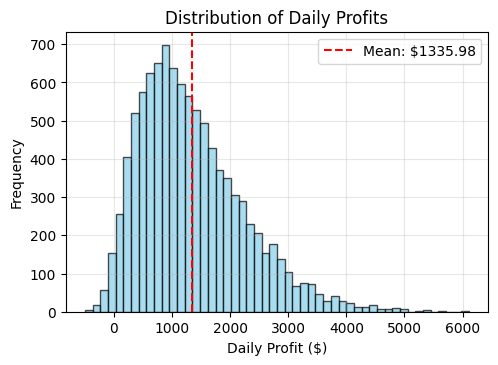

In [10]:
# Create visualization
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(profits, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(profits), color='red', linestyle='--', label=f'Mean: ${np.mean(profits):.2f}')
plt.xlabel('Daily Profit ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Profits')
plt.legend()
plt.grid(alpha=0.3)



### Cumulative Probablity Distribution

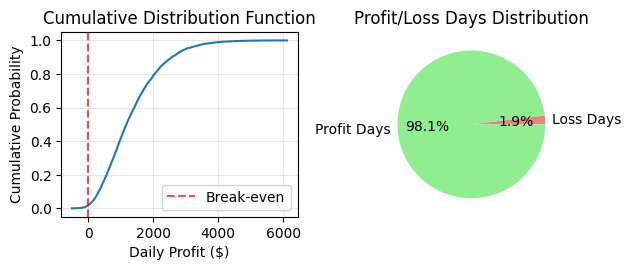

In [11]:
# Cumulative probability
plt.subplot(2, 2, 3)
sorted_profits = np.sort(profits)
cumulative_prob = np.arange(1, len(sorted_profits) + 1) / len(sorted_profits)
plt.plot(sorted_profits, cumulative_prob)
plt.axvline(0, color='red', linestyle='--', alpha=0.7, label='Break-even')
plt.xlabel('Daily Profit ($)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.legend()
plt.grid(alpha=0.3)

# Risk analysis
plt.subplot(2, 2, 4)
loss_trials = profits[profits < 0]
profit_trials = profits[profits >= 0]
categories = ['Loss Days', 'Profit Days']
counts = [len(loss_trials), len(profit_trials)]
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Profit/Loss Days Distribution')

plt.tight_layout()
plt.show()